In [ ]:
import pandas as pd
import numpy as np



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/Afame Technologies Project/Sms Spam Detection/spam.csv', encoding = 'latin')

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.dropna(axis = 1, inplace = True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.rename(columns = {
    'v1': 'Type',
    'v2' : 'Text'
}, inplace = True)

In [ ]:
df.sample(20)

,Type,Text,Num Char,Num Words,Num Sent,Cleaned_Text
5046,0,You're gonna have to be way more specific than...,51,12,1,gon na way specif
2502,0,2marrow only. Wed at &lt;#&gt; to 2 aha.,42,16,2,2marrow wed lt gt 2 aha
3762,0,Well there's a pattern emerging of my friends ...,220,44,1,well pattern emerg friend tell drive come smok...
4972,0,Yup it's at paragon... I havent decided whethe...,67,16,2,yup paragon havent decid whether 2 cut yet hee
3573,0,"Actually nvm, got hella cash, we still on for ...",61,20,1,actual nvm got hella cash still lt gt ish
2905,0,Fine. Do you remember me.,25,7,2,fine rememb
2278,0,I'm on my way home. Went to change batt 4 my w...,74,21,2,way home went chang batt 4 watch go shop bit lor
31,0,Yeah he got in at 2 and was v apologetic. n ha...,189,48,6,yeah got 2 v apologet n fallen actin like spoi...
3138,0,I'm freezing and craving ice. Fml,33,8,2,freez crave ice fml
2557,0,I am 6 ft. We will be a good combination!,41,11,1,6 good combin


In [ ]:
df[df['Type']==1]['Text']

,Text


In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [ ]:
df['Type'] = lc.fit_transform(df['Type'])

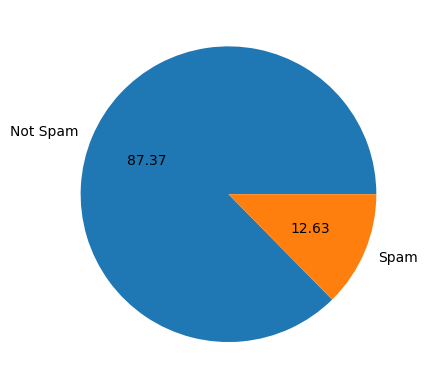

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(),
        labels = ['Not Spam', 'Spam'],
        autopct = '%0.2f')
plt.show()

In [ ]:
df['Num Char']=df['Text'].apply(len)

In [ ]:
import nltk
nltk.download('punkt')
df['Num Words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['Num Words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df['Num Sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(10)

,Type,Text,Num Char,Num Words,Num Sent
880,1,Reminder: You have not downloaded the content ...,127,27,4
1982,0,Hey i will be late... i'm at amk. Need to drin...,61,17,2
3541,0,ÌÏ come lt 25 n pass to me lar,30,9,1
5453,0,Except theres a chick with huge boobs.,38,8,1
270,0,"Come to mu, we're sorting out our narcotics si...",53,11,1
3251,0,Come to medical college at 7pm ......forward i...,50,10,1
4986,0,No rushing. I'm not working. I'm in school so ...,70,20,3
3686,0,Great! I shoot big loads so get ready!,38,10,2
1067,0,Meeting u is my work. . . Tel me when shall i ...,65,17,4
1077,0,"Yep, by the pretty sculpture",28,6,1


In [ ]:
df[df['Type']==0]['Num Char']

,Num Char
0,111
1,29
3,49
4,61
6,77
7,160
10,109
13,196
14,35
16,26


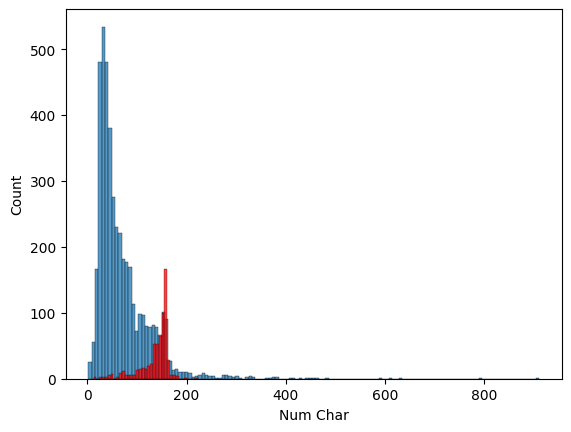

<Figure size 1200x800 with 0 Axes>

In [ ]:
import seaborn as sns
sns.histplot(df[df['Type']==0]['Num Char'])
sns.histplot(df[df['Type']==1]['Num Char'], color = 'red')

plt.figure(figsize = (12,8))
plt.show()

In [ ]:
df[['Type','Num Char','Num Words','Num Sent']].corr()

,Type,Num Char,Num Words,Num Sent
Type,1.000000,0.384717,0.262912,0.263939
Num Char,0.384717,1.000000,0.965760,0.624139
Num Words,0.262912,0.965760,1.000000,0.679971
Num Sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

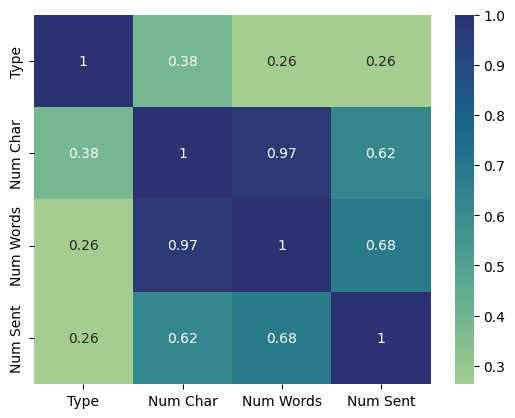

In [ ]:
sns.heatmap(df[['Type','Num Char','Num Words','Num Sent']].corr(), annot = True, cmap = 'crest')

In [ ]:
import string

string.punctuation

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


def text_conversion(text):
  text = text.lower()

  text = nltk.word_tokenize(text)


  y = []
  for i in text:
    if i.isalnum():
      y.append(i)


  text = y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and string.punctuation:
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return ' '.join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_conversion("What do u reckon as need 2 arrange transport i...	")

'u reckon need 2 arrang transport'

In [ ]:
df['Cleaned_Text'] = df['Text'].apply(text_conversion)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.sample(15)

,Type,Text,Num Char,Num Words,Num Sent,Cleaned_Text
3752,0,Nimbomsons. Yep phone knows that one. Obviousl...,70,15,3,nimbomson yep phone know one obvious co that r...
1231,1,Can U get 2 phone NOW? I wanna chat 2 set up m...,147,29,2,u get 2 phone wan na chat 2 set meet call 0909...
2704,0,"Easy mate, * guess the quick drink was bit amb...",53,12,1,easi mate guess quick drink bit ambiti
228,0,"Sorry battery died, yeah I'm here",33,8,1,sorri batteri die yeah
593,0,Speaking of does he have any cash yet?,38,9,1,speak cash yet
2941,0,Ok... I din get ur msg...,25,8,2,ok din get ur msg
4916,0,Xy trying smth now. U eat already? We havent...,47,12,3,xy tri smth u eat alreadi havent
4632,0,Hey come online! Use msn... We are all there,44,11,2,hey come onlin use msn
2436,0,So are you guys asking that i get that slipper...,80,17,1,guy ask get slipper gone last year
293,0,Hurt me... Tease me... Make me cry... But in t...,153,39,2,hurt teas make cri end life die plz keep one r...


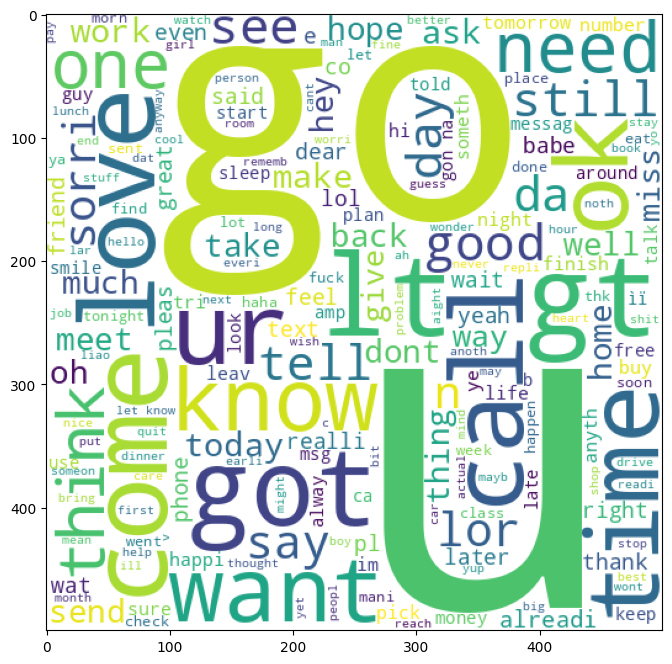

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white',
               height = 500,
               width = 500,
               min_font_size = 10
               )
ham_wc = wc.generate(df[df['Type']==0]['Cleaned_Text'].str.cat(sep = ' '))
plt.figure(figsize = (12,8))
plt.imshow(ham_wc)

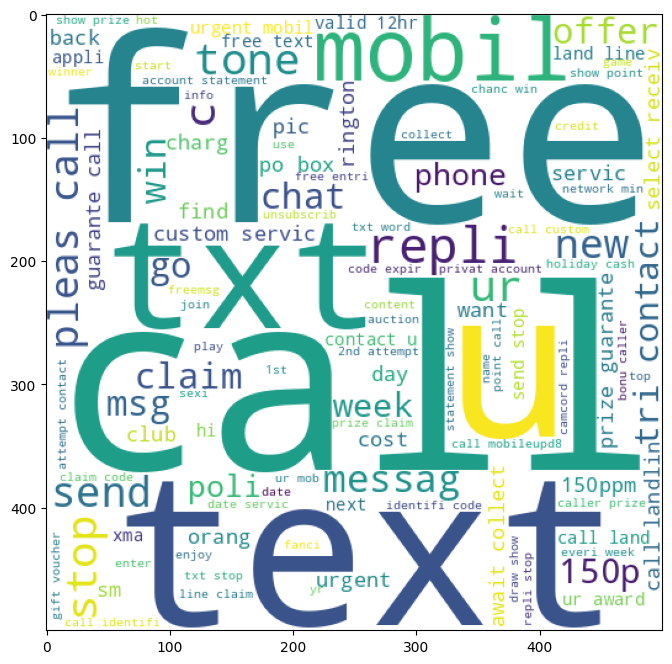

In [ ]:
spam_wc = wc.generate(df[df['Type']==1]['Cleaned_Text'].str.cat(sep = ' '))
plt.figure(figsize = (12,8))
plt.imshow(spam_wc)

In [ ]:
ham_corpus = []
for text in df[df['Type']==0]['Cleaned_Text'].tolist():
  for word in text.split():
    ham_corpus.append(word)

In [ ]:
spam_corpus = []
for text in df[df['Type']==1]['Cleaned_Text'].tolist():
  for word in text.split():
    spam_corpus.append(word)

In [ ]:
print(len(ham_corpus),': Number of Non Spam Words')
print(len(spam_corpus),': Collection of Spam Words')

35404 : Number of Non Spam Words
9939 : Collection of Spam Words


In [ ]:
from collections import Counter

pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<ipython-input-161-1b1fe3285c1a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],


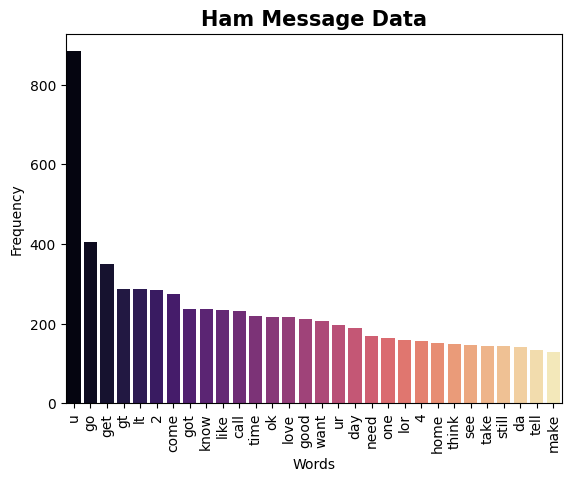

<Figure size 1200x800 with 0 Axes>

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette = 'magma')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Ham Message Data', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.figure(figsize = (12,8))
plt.show()

<ipython-input-160-f2d9870ef0ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],


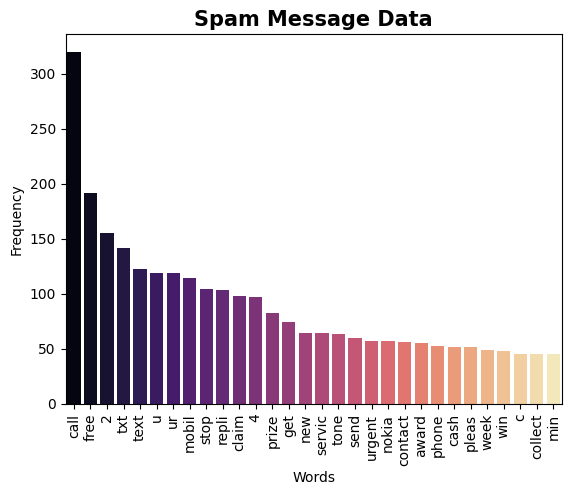

<Figure size 1200x800 with 0 Axes>

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette = 'magma')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Spam Message Data', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.figure(figsize = (12,8))
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
cv = CountVectorizer()
x = cv.fit_transform(df['Cleaned_Text']).toarray()
y = df['Type'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 2)
from sklearn.linear_model import LogisticRegression




# **Using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
cv = CountVectorizer()
x = cv.fit_transform(df['Cleaned_Text']).toarray()
y = df['Type'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 2)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()


clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'LR' : lr,
    'SVC' : svc,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb,
}




def hybrid_model(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)


  return accuracy, precision


accuracy_scores = []
precision_scores = []


for name, clf in clfs.items():
  model_accuracy, model_precision = hybrid_model(clf, x_train, x_test, y_train, y_test)

  # print("For: ", name)
  # print("Accuracy Score: ", model_accuracy)
  # print("Precision Score: ", model_precision)

  accuracy_scores.append(model_accuracy)
  precision_scores.append(model_precision)



model_performance_df_using_countvectorizer = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy Score": accuracy_scores,
    "Precision Score" : precision_scores
}).sort_values('Precision Score',ascending = False)



model_performance_df_using_countvectorizer


# **Using the TFID Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Type'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 2)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

lr = LogisticRegression()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()


clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'LR' : lr,
    'SVC' : svc,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb,
}




def hybrid_model(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)


  return accuracy, precision


accuracy_scores = []
precision_scores = []


for name, clf in clfs.items():
  model_accuracy, model_precision = hybrid_model(clf, x_train, x_test, y_train, y_test)

  # print("For: ", name)
  # print("Accuracy Score: ", model_accuracy)
  # print("Precision Score: ", model_precision)

  accuracy_scores.append(model_accuracy)
  precision_scores.append(model_precision)



model_performance_df_using_tfidfvectorizer = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy Score": accuracy_scores,
    "Precision Score" : precision_scores
}).sort_values('Precision Score',ascending = False)



model_performance_df_using_tfidfvectorizer


# Using the TFIDF Vectorizer

In [ ]:
x = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Type'].values
# hybrid_model(rfc, x_train, x_test,y_train, y_test,)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# import pickle

# tfidf_path = '/content/tfid_vectorizer.pkl'
# model_path = '/content/spam_text_detection_model.pkl'


# tfidf = pickle.load(open(tfidf_path, 'rb'))
# model = pickle.load(open(model_path, 'rb'))


def spam_detection_model(text):
  text = text_conversion(text)
  text = tfidf.transform([text])
  result = model.predict(text)[0]

  if result == 0:
    return 'Not Spam'
  else:
    return 'Spam'

In [ ]:
(spam_detection_model("Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"))

'Spam'

In [ ]:
spam_df_test = df[df['Type']==1]['Text'].head(10)
spam_df_test.columns = ['Text']

In [ ]:
spam_df_test

,Text
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
8,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
11,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
12,"URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"
15,"XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
19,"England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+"
34,Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
42,07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow


In [ ]:
not_spam_df_test = df.sample(10)[df['Type']==1]['Text'].head(10)
not_spam_df_test.columns = ['Text']
not_spam_df_test

<ipython-input-142-5775bcbd8be0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_spam_df_test = df.sample(10)[df['Type']==1]['Text'].head(10)


,Text
3219,Do you want a New Nokia 3510i colour phone DeliveredTomorrow? With 300 free minutes to any mobile + 100 free texts + Free Camcorder reply or call 08000930705


In [ ]:
# import streamlit as st
import pickle
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
stopwords.words('english')
import string

def text_transform(text):


      text = text.lower()
      text = nltk.word_tokenize(text)

      y = []

      for i in text:
        if i.isalnum():
          y.append(i)


      text = y[:]
      y.clear()



      for i in text:
        if i not in stopwords.words('english') and string.punctuation:
          y.append(i)



      text = y[:]
      y.clear()


      for i in text:
        y.append(ps.stem(i))
      return ' '.join(y)



tfidf_path = '/content/tfid_vectorizer.pkl'
model_path = '/content/spam_text_detection_model.pkl'


tfidf = pickle.load(open(tfidf_path,'rb'))
model = pickle.load(open(model_path,'rb'))


def spam_detection_model(text):
  text = text_transform(text)
  text = tfidf.transform([text])
  result = model.predict(text)[0]
  return result









prediction = spam_detection_model("England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+")
if prediction == 1:
  print("Spam")
else:
   print('Not Spam')

Spam


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import sys
print(sys.version)

3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
